# Chapter 3: Harmony and Chord Progressions

## Learning Objectives

By the end of this chapter you will be able to:

1. **Build chords** from root notes and interval formulas
2. Understand **diatonic harmony** -- the chords that naturally belong to a key
3. Recognize and generate **common chord progressions** (I-IV-V-I, I-V-vi-IV, ii-V-I)
4. Compute **frequency ratios** that explain why some chords sound consonant
5. Visualize the **circle of fifths** and chord relationships

---

## What Is a Chord?

A **chord** is three or more notes sounded together. The most basic chord is a **triad**: three notes stacked in thirds.

```
  Major triad:    Root + Major 3rd (4 semitones) + Perfect 5th (7 semitones)
  Minor triad:    Root + Minor 3rd (3 semitones) + Perfect 5th (7 semitones)
  Diminished:     Root + Minor 3rd (3 semitones) + Diminished 5th (6 semitones)
  Augmented:      Root + Major 3rd (4 semitones) + Augmented 5th (8 semitones)
```

In terms of frequency, a major triad in just intonation has the ratio $4:5:6$, which is why it sounds so clean. Equal temperament approximates this.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

NOTE_NAMES: list[str] = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]

def note_to_midi(name: str, octave: int = 4) -> int:
    return NOTE_NAMES.index(name) + (octave + 1) * 12

def midi_to_freq(midi: int) -> float:
    return 440.0 * 2 ** ((midi - 69) / 12)

def midi_to_name(midi: int) -> str:
    return f"{NOTE_NAMES[midi % 12]}{midi // 12 - 1}"

# Chord type definitions: intervals above root in semitones
CHORD_TYPES: dict[str, list[int]] = {
    "major":      [0, 4, 7],
    "minor":      [0, 3, 7],
    "diminished": [0, 3, 6],
    "augmented":  [0, 4, 8],
    "major7":     [0, 4, 7, 11],
    "minor7":     [0, 3, 7, 10],
    "dominant7":  [0, 4, 7, 10],
}

def build_chord(root_midi: int, chord_type: str = "major") -> list[int]:
    """Build a chord from a root note and chord type."""
    intervals = CHORD_TYPES[chord_type]
    return [root_midi + i for i in intervals]

def chord_name(root: str, chord_type: str) -> str:
    """Format a chord name like 'C major' or 'Am'."""
    suffix = {"major": "", "minor": "m", "diminished": "dim",
              "augmented": "aug", "major7": "maj7",
              "minor7": "m7", "dominant7": "7"}
    return f"{root}{suffix.get(chord_type, chord_type)}"

# Build and display all triad types from C
root = note_to_midi("C", 4)
print(f"{'Chord':<16} {'Notes':<20} {'Frequencies (Hz)':<30} {'Ratios to Root'}")
print("─" * 80)
for ctype in ["major", "minor", "diminished", "augmented"]:
    notes = build_chord(root, ctype)
    names = [midi_to_name(n) for n in notes]
    freqs = [midi_to_freq(n) for n in notes]
    ratios = [f / freqs[0] for f in freqs]
    print(f"{chord_name('C', ctype):<16} {', '.join(names):<20} "
          f"{', '.join(f'{f:.1f}' for f in freqs):<30} "
          f"{', '.join(f'{r:.4f}' for r in ratios)}")

Chord            Notes                Frequencies (Hz)               Ratios to Root
────────────────────────────────────────────────────────────────────────────────
C                C4, E4, G4           261.6, 329.6, 392.0            1.0000, 1.2599, 1.4983
Cm               C4, D#4, G4          261.6, 311.1, 392.0            1.0000, 1.1892, 1.4983
Cdim             C4, D#4, F#4         261.6, 311.1, 370.0            1.0000, 1.1892, 1.4142
Caug             C4, E4, G#4          261.6, 329.6, 415.3            1.0000, 1.2599, 1.5874


## Why Consonance? Frequency Ratios

Two notes sound **consonant** when their frequency ratio is a simple fraction. The simpler the ratio, the more "at rest" the combination feels.

| Interval | Just Ratio | Equal Temperament | Difference |
|----------|-----------|-------------------|------------|
| Unison   | $1:1$     | $1.0000$          | $0\%$      |
| P5       | $3:2$     | $1.4983$          | $0.11\%$   |
| P4       | $4:3$     | $1.3348$          | $0.11\%$   |
| M3       | $5:4$     | $1.2599$          | $0.79\%$   |

A major triad in just intonation is $4:5:6$. Equal temperament gets close enough that we hear it as consonant.

In [2]:
# Compare just intonation ratios vs equal temperament

just_ratios: dict[str, float] = {
    "Unison":    1/1,
    "Minor 2nd": 16/15,
    "Major 2nd": 9/8,
    "Minor 3rd": 6/5,
    "Major 3rd": 5/4,
    "Perfect 4th": 4/3,
    "Tritone":   45/32,
    "Perfect 5th": 3/2,
    "Minor 6th": 8/5,
    "Major 6th": 5/3,
    "Minor 7th": 9/5,
    "Major 7th": 15/8,
    "Octave":    2/1,
}

print(f"{'Interval':<14} {'Just Ratio':<14} {'ET Ratio':<12} {'Cents Off':<10}")
print("─" * 50)
for i, (name, just) in enumerate(just_ratios.items()):
    et = 2 ** (i / 12)
    # Cents = 1200 * log2(ratio difference)
    cents_off = 1200 * np.log2(et / just)
    print(f"{name:<14} {just:<14.6f} {et:<12.6f} {cents_off:+.2f}")

Interval       Just Ratio     ET Ratio     Cents Off 
──────────────────────────────────────────────────
Unison         1.000000       1.000000     +0.00
Minor 2nd      1.066667       1.059463     -11.73
Major 2nd      1.125000       1.122462     -3.91
Minor 3rd      1.200000       1.189207     -15.64
Major 3rd      1.250000       1.259921     +13.69
Perfect 4th    1.333333       1.334840     +1.96
Tritone        1.406250       1.414214     +9.78
Perfect 5th    1.500000       1.498307     -1.96
Minor 6th      1.600000       1.587401     -13.69
Major 6th      1.666667       1.681793     +15.64
Minor 7th      1.800000       1.781797     -17.60
Major 7th      1.875000       1.887749     +11.73
Octave         2.000000       2.000000     +0.00


## Diatonic Harmony: Chords in a Key

When you build triads on each degree of a major scale using **only notes from that scale**, you get the **diatonic chords**:

```
Scale degree:   I      ii     iii    IV     V      vi     vii°
Quality:        Major  minor  minor  Major  Major  minor  dim
In key of C:    C      Dm     Em     F      G      Am     Bdim
```

Upper-case Roman numerals = major chords. Lower-case = minor. The ° symbol means diminished.

This is why certain chords "belong together" -- they share a key.

In [3]:
# Build diatonic triads from a major scale

MAJOR_PATTERN: list[int] = [2, 2, 1, 2, 2, 2, 1]

# The quality of each diatonic triad in a major key
DIATONIC_QUALITIES: list[str] = [
    "major", "minor", "minor", "major", "major", "minor", "diminished"
]
ROMAN_NUMERALS: list[str] = ["I", "ii", "iii", "IV", "V", "vi", "vii°"]

def diatonic_chords(root_name: str, octave: int = 4) -> list[tuple[str, str, list[int]]]:
    """Build all 7 diatonic triads for a major key.
    
    Returns list of (roman_numeral, chord_name, midi_notes).
    """
    root_midi = note_to_midi(root_name, octave)
    # Build scale degrees
    scale = [root_midi]
    for interval in MAJOR_PATTERN:
        scale.append(scale[-1] + interval)
    
    chords = []
    for i in range(7):
        root = scale[i]
        quality = DIATONIC_QUALITIES[i]
        notes = build_chord(root, quality)
        rn = ROMAN_NUMERALS[i]
        cname = chord_name(NOTE_NAMES[root % 12], quality)
        chords.append((rn, cname, notes))
    
    return chords

# Display diatonic chords in C major
print("Diatonic chords in C major:")
print(f"{'Degree':<8} {'Chord':<10} {'Notes':<20} {'Frequencies'}")
print("─" * 60)
for rn, cname, notes in diatonic_chords("C"):
    names = [midi_to_name(n) for n in notes]
    freqs = [f"{midi_to_freq(n):.1f}" for n in notes]
    print(f"{rn:<8} {cname:<10} {', '.join(names):<20} {', '.join(freqs)}")

Diatonic chords in C major:
Degree   Chord      Notes                Frequencies
────────────────────────────────────────────────────────────
I        C          C4, E4, G4           261.6, 329.6, 392.0
ii       Dm         D4, F4, A4           293.7, 349.2, 440.0
iii      Em         E4, G4, B4           329.6, 392.0, 493.9
IV       F          F4, A4, C5           349.2, 440.0, 523.3
V        G          G4, B4, D5           392.0, 493.9, 587.3
vi       Am         A4, C5, E5           440.0, 523.3, 659.3
vii°     Bdim       B4, D5, F5           493.9, 587.3, 698.5


## Common Chord Progressions

Most songs use a handful of tried-and-true progressions. Here are the big ones:

| Progression | Roman Numerals | In C Major | Used In |
|-------------|---------------|------------|----------|
| "Pop"       | I - V - vi - IV | C - G - Am - F | Thousands of pop songs |
| "Classic"   | I - IV - V - I  | C - F - G - C  | Rock, country, folk |
| "Jazz ii-V-I" | ii - V - I    | Dm - G - C    | Jazz standards |
| "50s"       | I - vi - IV - V | C - Am - F - G | Doo-wop, early rock |
| "Andalusian" | i - VII - VI - V | Am - G - F - E | Flamenco, rock |

In [4]:
# Define progressions as lists of (scale_degree_index, quality)
# degree_index is 0-based (0 = I, 1 = ii, etc.)

PROGRESSIONS: dict[str, list[int]] = {
    "I-V-vi-IV (Pop)":      [0, 4, 5, 3],
    "I-IV-V-I (Classic)":   [0, 3, 4, 0],
    "ii-V-I (Jazz)":        [1, 4, 0],
    "I-vi-IV-V (50s)":      [0, 5, 3, 4],
    "I-IV-vi-V":            [0, 3, 5, 4],
}

def realize_progression(key: str, degree_indices: list[int]) -> list[tuple[str, str, list[int]]]:
    """Convert a progression (list of scale degree indices) to actual chords."""
    all_chords = diatonic_chords(key)
    return [all_chords[i] for i in degree_indices]

# Show all progressions in C major
for prog_name, degrees in PROGRESSIONS.items():
    chords = realize_progression("C", degrees)
    chord_str = " → ".join(cname for _, cname, _ in chords)
    rn_str = " → ".join(rn for rn, _, _ in chords)
    print(f"{prog_name}")
    print(f"  {rn_str}")
    print(f"  {chord_str}")
    print()

I-V-vi-IV (Pop)
  I → V → vi → IV
  C → G → Am → F

I-IV-V-I (Classic)
  I → IV → V → I
  C → F → G → C

ii-V-I (Jazz)
  ii → V → I
  Dm → G → C

I-vi-IV-V (50s)
  I → vi → IV → V
  C → Am → F → G

I-IV-vi-V
  I → IV → vi → V
  C → F → Am → G



In [5]:
# Listen to a chord progression using stacked sine waves
from IPython.display import Audio

def chord_to_audio(
    midi_notes: list[int],
    duration: float = 1.0,
    sample_rate: int = 22050,
) -> np.ndarray:
    """Generate audio for a chord (multiple simultaneous notes)."""
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    wave = np.zeros_like(t)
    for midi in midi_notes:
        freq = midi_to_freq(midi)
        wave += np.sin(2 * np.pi * freq * t)
    # Normalize and apply envelope
    wave = wave / len(midi_notes)
    fade = int(len(t) * 0.05)
    wave[:fade] *= np.linspace(0, 1, fade)
    wave[-fade:] *= np.linspace(1, 0, fade)
    return wave * 0.4

def progression_to_audio(
    chords: list[list[int]],
    beats_per_chord: float = 1.5,
    sample_rate: int = 22050,
) -> np.ndarray:
    """Generate audio for a chord progression."""
    segments = [chord_to_audio(c, beats_per_chord, sample_rate) for c in chords]
    return np.concatenate(segments)

# Play I-V-vi-IV in C major (the famous pop progression)
prog = realize_progression("C", PROGRESSIONS["I-V-vi-IV (Pop)"])
chord_notes = [notes for _, _, notes in prog]
audio = progression_to_audio(chord_notes * 2)  # play twice

print("I - V - vi - IV in C major (x2):")
print(" → ".join(cname for _, cname, _ in prog))
Audio(audio, rate=22050)

I - V - vi - IV in C major (x2):
C → G → Am → F


## The Circle of Fifths

The **circle of fifths** arranges all 12 keys by ascending perfect fifths (7 semitones). Adjacent keys on the circle share 6 out of 7 notes, which is why modulations to neighboring keys sound smooth.

$$C \xrightarrow{+7} G \xrightarrow{+7} D \xrightarrow{+7} A \xrightarrow{+7} \cdots \xrightarrow{+7} F \xrightarrow{+7} C$$

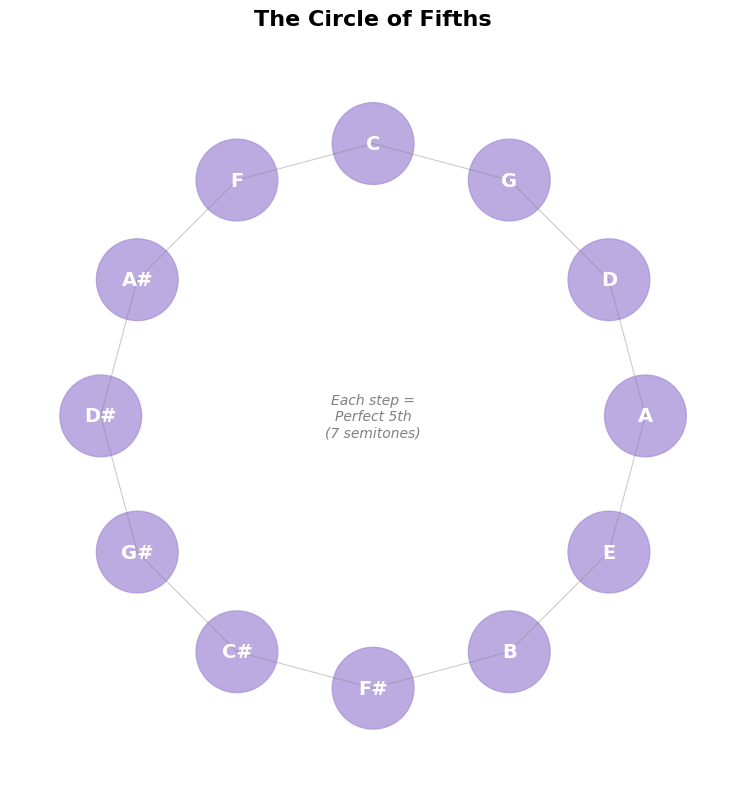

In [6]:
# Draw the circle of fifths

# Keys in order of fifths
circle_keys: list[str] = []
current = 0  # Start at C
for _ in range(12):
    circle_keys.append(NOTE_NAMES[current % 12])
    current += 7  # Perfect fifth = 7 semitones

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")
ax.set_xlim(-1.6, 1.6)
ax.set_ylim(-1.6, 1.6)
ax.axis("off")
ax.set_title("The Circle of Fifths", fontsize=16, fontweight="bold", pad=20)

radius = 1.2
for i, key in enumerate(circle_keys):
    # Angle: start at top (90°), go clockwise
    angle = np.pi / 2 - i * 2 * np.pi / 12
    x = radius * np.cos(angle)
    y = radius * np.sin(angle)
    
    # Draw circle for each key
    circle = plt.Circle((x, y), 0.18, color="#AA96DA", alpha=0.8)
    ax.add_patch(circle)
    ax.text(x, y, key, ha="center", va="center", fontsize=14, fontweight="bold", color="white")
    
    # Draw connecting lines
    next_i = (i + 1) % 12
    next_angle = np.pi / 2 - next_i * 2 * np.pi / 12
    x2 = radius * np.cos(next_angle)
    y2 = radius * np.sin(next_angle)
    ax.plot([x, x2], [y, y2], "gray", linewidth=0.8, alpha=0.4)

# Annotate the interval
ax.text(0, 0, "Each step =\nPerfect 5th\n(7 semitones)", ha="center", va="center",
        fontsize=10, color="gray", style="italic")

plt.tight_layout()
plt.show()

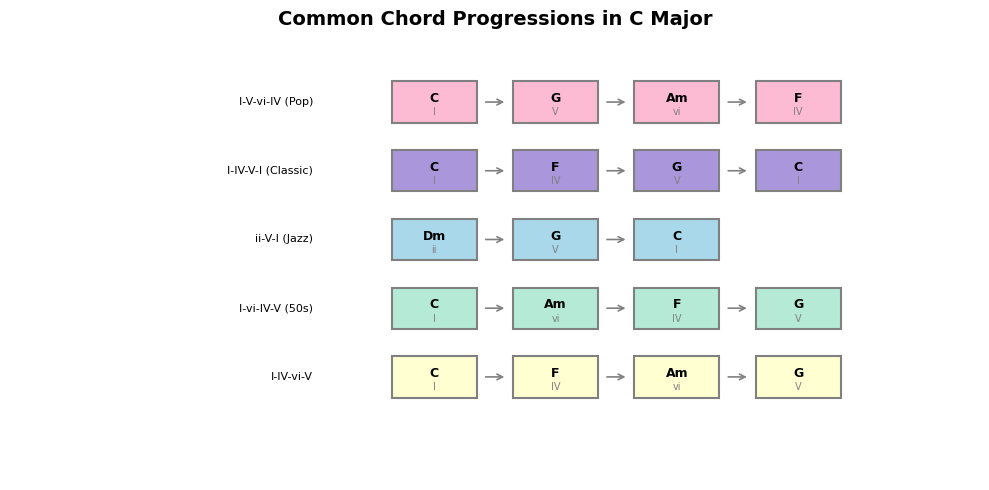

In [7]:
# Chord progression map: visualize which degree leads to which
# This shows the "gravity" of chord progressions

fig, ax = plt.subplots(figsize=(10, 5))

prog_colors = {
    "I-V-vi-IV (Pop)":    "#FCBAD3",
    "I-IV-V-I (Classic)": "#AA96DA",
    "ii-V-I (Jazz)":      "#A8D8EA",
    "I-vi-IV-V (50s)":    "#B5EAD7",
    "I-IV-vi-V":          "#FFFFD2",
}

y_pos = 0
for prog_name, degrees in PROGRESSIONS.items():
    chords = realize_progression("C", degrees)
    x_positions = list(range(len(chords)))
    color = prog_colors[prog_name]
    
    # Draw chord boxes
    for x, (rn, cname, _) in zip(x_positions, chords):
        rect = plt.Rectangle((x - 0.35, y_pos - 0.3), 0.7, 0.6,
                            facecolor=color, edgecolor="gray", linewidth=1.5)
        ax.add_patch(rect)
        ax.text(x, y_pos + 0.05, cname, ha="center", va="center", fontsize=9, fontweight="bold")
        ax.text(x, y_pos - 0.15, rn, ha="center", va="center", fontsize=7, color="gray")
    
    # Draw arrows between chords
    for i in range(len(chords) - 1):
        ax.annotate("", xy=(x_positions[i+1] - 0.4, y_pos),
                   xytext=(x_positions[i] + 0.4, y_pos),
                   arrowprops=dict(arrowstyle="->", color="gray", lw=1.2))
    
    ax.text(-1.0, y_pos, prog_name, ha="right", va="center", fontsize=8)
    y_pos -= 1.0

ax.set_xlim(-3.5, max(len(d) for d in PROGRESSIONS.values()) + 0.5)
ax.set_ylim(y_pos - 0.5, 1)
ax.axis("off")
ax.set_title("Common Chord Progressions in C Major", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

## Transposing Progressions

One of the beauties of Roman numeral analysis is that progressions are **key-independent**. A I-V-vi-IV progression works in any key. Let's transpose.

In [8]:
# Transpose the pop progression into every key

print("I - V - vi - IV progression in all 12 keys:\n")
for key in NOTE_NAMES:
    chords = realize_progression(key, PROGRESSIONS["I-V-vi-IV (Pop)"])
    chord_str = " → ".join(f"{cname:<5}" for _, cname, _ in chords)
    print(f"  Key of {key + ':':<4} {chord_str}")

I - V - vi - IV progression in all 12 keys:

  Key of C:   C     → G     → Am    → F    
  Key of C#:  C#    → G#    → A#m   → F#   
  Key of D:   D     → A     → Bm    → G    
  Key of D#:  D#    → A#    → Cm    → G#   
  Key of E:   E     → B     → C#m   → A    
  Key of F:   F     → C     → Dm    → A#   
  Key of F#:  F#    → C#    → D#m   → B    
  Key of G:   G     → D     → Em    → C    
  Key of G#:  G#    → D#    → Fm    → C#   
  Key of A:   A     → E     → F#m   → D    
  Key of A#:  A#    → F     → Gm    → D#   
  Key of B:   B     → F#    → G#m   → E    


## Exercises

1. **Build a chord**: Use `build_chord` to construct an F#m7 chord. What notes does it contain?
2. **Diatonic analysis**: Build the diatonic chords for G major. Which chord is the ii?
3. **Frequency ratios**: Compute the frequency ratio of a major 3rd (4 semitones) in equal temperament. How close is it to $5/4$?
4. **Progression listening**: Generate audio for the ii-V-I and the I-vi-IV-V progressions. Which feels more resolved?

---

## What's Next

Melody gives us the horizontal dimension, harmony gives us the vertical. In **Chapter 4: Rhythm and Groove**, we add the third essential dimension -- time. How notes are placed in time is what makes music feel alive.